<a href="https://colab.research.google.com/github/suneethkunche/codes/blob/main/FIFA_2024_PLAYER_VALUE_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries



In [ ]:
from ast import increment_lineno

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
from sklearn.model_selection import cross_val_score
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline


In [ ]:
import os

In [ ]:
df = pd.read_csv('/content/player_stats.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00


In [ ]:
df.describe()

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,...,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes
count,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,...,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.00000,5682.000000,5682.000000,5682.000000
mean,181.670539,75.282295,26.316262,58.912179,56.128476,46.728441,48.820838,56.324006,61.959345,50.724921,...,47.164203,48.099789,43.299542,48.174938,42.931890,16.187610,16.43805,16.191834,16.071982,16.570222
std,6.829238,6.998971,4.729967,16.567068,18.772075,20.519430,20.975966,16.846410,8.893309,19.780636,...,19.463368,18.086672,17.086473,15.781737,17.912619,17.146572,17.63526,16.993154,16.808674,17.942154
min,156.000000,54.000000,17.000000,8.000000,5.000000,7.000000,7.000000,11.000000,32.000000,3.000000,...,5.000000,7.000000,4.000000,8.000000,4.000000,2.000000,2.00000,2.000000,2.000000,3.000000
25%,177.000000,70.000000,23.000000,55.000000,51.000000,27.000000,30.000000,45.000000,56.000000,40.000000,...,33.000000,36.000000,32.000000,39.000000,30.000000,8.000000,8.00000,8.000000,8.000000,8.000000
50%,182.000000,75.000000,26.000000,63.000000,62.000000,54.000000,57.000000,60.000000,62.000000,56.000000,...,51.000000,50.000000,43.000000,49.000000,44.000000,11.000000,11.00000,11.000000,11.000000,11.000000
75%,186.000000,80.000000,30.000000,69.000000,68.000000,64.000000,66.000000,69.000000,68.000000,65.000000,...,62.000000,62.000000,56.000000,60.000000,57.000000,14.000000,14.00000,14.000000,14.000000,14.000000
max,204.000000,102.000000,41.000000,94.000000,95.000000,87.000000,91.000000,96.000000,93.000000,93.000000,...,91.000000,93.000000,94.000000,92.000000,90.000000,90.000000,90.00000,87.000000,90.000000,89.000000


In [ ]:
df.shape

(5682, 41)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player          5682 non-null   object
 1   country         5682 non-null   object
 2   height          5682 non-null   int64 
 3   weight          5682 non-null   int64 
 4   age             5682 non-null   int64 
 5   club            5682 non-null   object
 6   ball_control    5682 non-null   int64 
 7   dribbling       5682 non-null   int64 
 8   marking         5524 non-null   object
 9   slide_tackle    5682 non-null   int64 
 10  stand_tackle    5682 non-null   int64 
 11  aggression      5682 non-null   int64 
 12  reactions       5682 non-null   int64 
 13  att_position    5682 non-null   int64 
 14  interceptions   5682 non-null   int64 
 15  vision          5682 non-null   int64 
 16  composure       5682 non-null   int64 
 17  crossing        5682 non-null   int64 
 18  short_pa

In [ ]:
df.isnull().sum()

player              0
country             0
height              0
weight              0
age                 0
club                0
ball_control        0
dribbling           0
marking           158
slide_tackle        0
stand_tackle        0
aggression          0
reactions           0
att_position        0
interceptions       0
vision              0
composure           0
crossing            0
short_pass          0
long_pass           0
acceleration        0
stamina             0
strength            0
balance             0
sprint_speed        0
agility             0
jumping             0
heading             0
shot_power          0
finishing           0
long_shots          0
curve               0
fk_acc              0
penalties           0
volleys             0
gk_positioning      0
gk_diving           0
gk_handling         0
gk_kicking          0
gk_reflexes         0
value               0
dtype: int64

**DATA PREPROCESSING**

In [ ]:
df.drop(['marking'], axis=1, inplace=True)

In [ ]:
#value conversion
def value_conversion(value):
  if isinstance(value,object):
    out = value.replace('$','')
    if '.' in out:
      out = float(out.replace('.',''))
    return float(out)



In [ ]:
 df['value'] = df['value'].apply(lambda x: value_conversion(x))

In [ ]:
df['value'] = round(df['value']/1000000,6)

In [ ]:

df.rename(columns={'value':'value(Million)'}, inplace=True)

In [ ]:
df.head()

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value(Million)
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,68,73,...,32,34,41,33,10,11,6,7,9,1.4000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,56,58,...,65,62,48,46,12,15,14,8,14,0.0975
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,13,16,...,20,15,26,16,64,74,65,68,74,1.1000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,66,69,...,25,13,22,19,10,10,8,14,9,0.0650
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,14,16,...,9,10,16,5,61,59,62,64,64,0.0300


In [ ]:
df.shape


(5682, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          5682 non-null   object 
 1   country         5682 non-null   object 
 2   height          5682 non-null   int64  
 3   weight          5682 non-null   int64  
 4   age             5682 non-null   int64  
 5   club            5682 non-null   object 
 6   ball_control    5682 non-null   int64  
 7   dribbling       5682 non-null   int64  
 8   slide_tackle    5682 non-null   int64  
 9   stand_tackle    5682 non-null   int64  
 10  aggression      5682 non-null   int64  
 11  reactions       5682 non-null   int64  
 12  att_position    5682 non-null   int64  
 13  interceptions   5682 non-null   int64  
 14  vision          5682 non-null   int64  
 15  composure       5682 non-null   int64  
 16  crossing        5682 non-null   int64  
 17  short_pass      5682 non-null   i

# Data **Visualization**

In [ ]:
#let's visualize top 11 clubs
club_df = df['club'].value_counts().reset_index()[:10]

In [ ]:
club_df

,index,club
0,River Plate,21
1,Liverpool,17
2,LanÃºs,17
3,Holstein Kiel,16
4,Barnsley,16
5,Girona FC,16
6,Arsenal,16
7,VfB Stuttgart,15
8,Valencia CF,15
9,Jeonbuk Hyundai,15


In [ ]:
country = df['country'].value_counts().nlargest(5)
country

England      516
Germany      390
Spain        356
France       309
Argentina    302
Name: country, dtype: int64

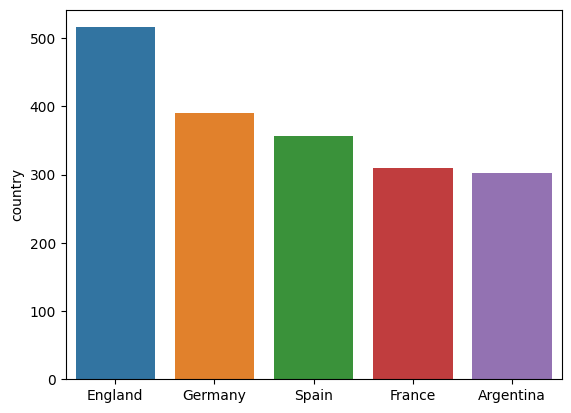

In [ ]:
sns.barplot(x=country.index, y=country)
plt.show()

In [ ]:
club = df['club'].value_counts().nlargest(5)
club

River Plate       21
Liverpool         17
LanÃºs            17
Holstein Kiel     16
Barnsley          16
Name: club, dtype: int64

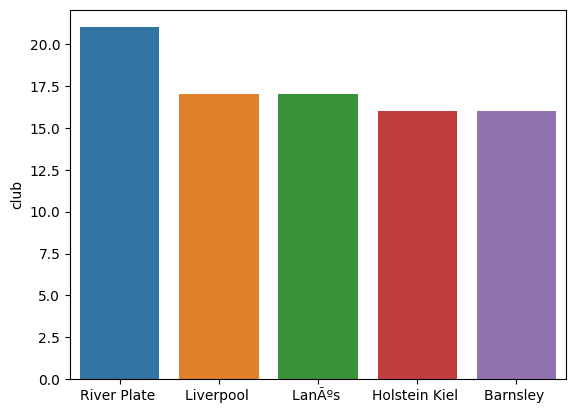

In [ ]:
sns.barplot(x=club.index, y=club)
plt.show()

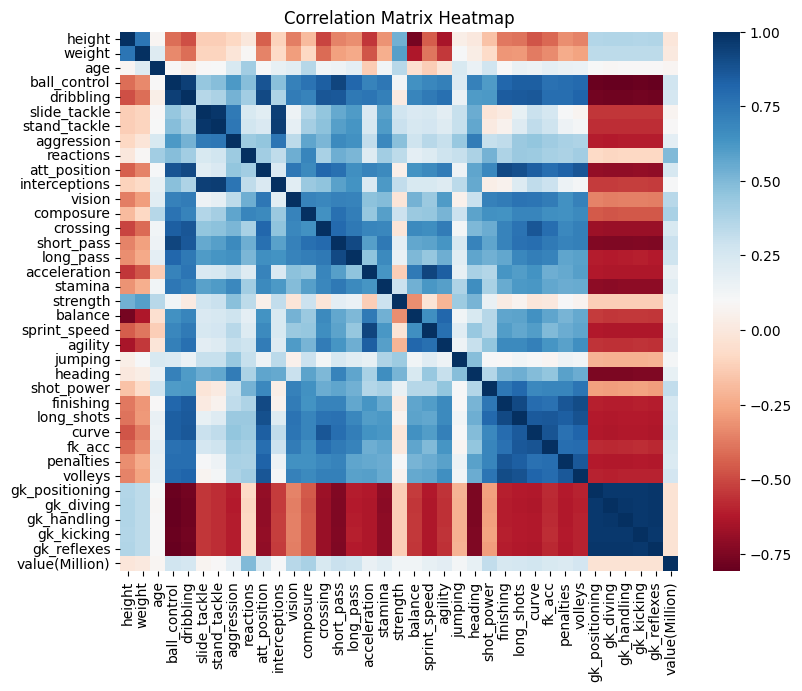

In [ ]:
df_num = df.drop(["player", "country", "club"], axis=1)
corr = df_num.corr()

# Create a correlation heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(corr, cmap='RdBu')
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: xlabel='height'>

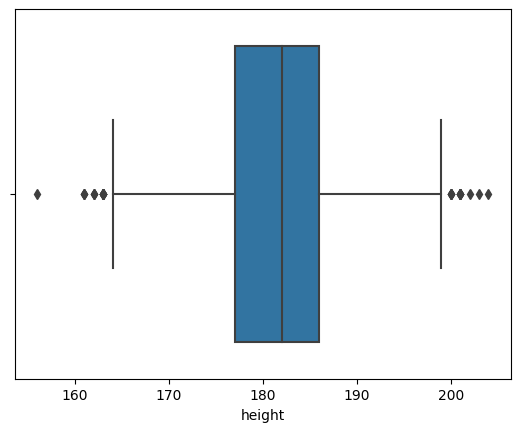

In [ ]:
# let's get outliers using box plot
sns.boxplot(data=df,x='height')


<Axes: xlabel='weight'>

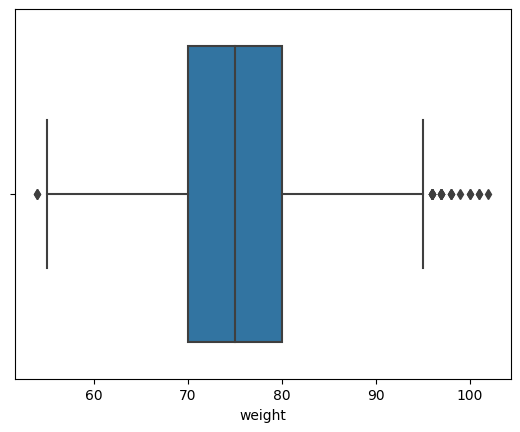

In [ ]:
sns.boxplot(data=df,x='weight')

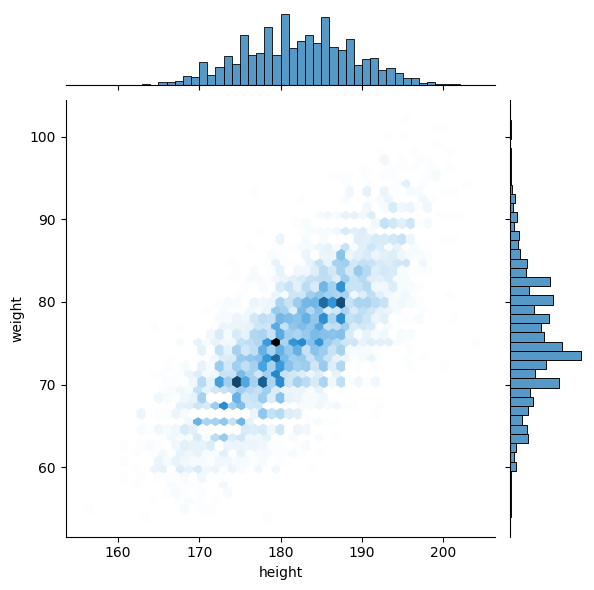

In [ ]:
sns.jointplot(data=df,x='height',y='weight',kind='hex')

<Axes: xlabel='jumping', ylabel='heading'>

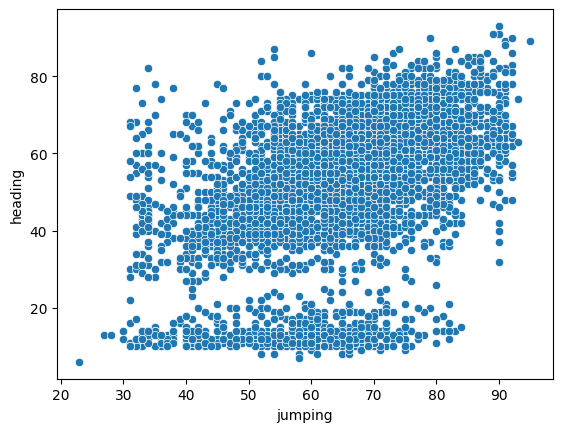

In [ ]:
sns.scatterplot(x='jumping', y='heading', data=df)

<Axes: xlabel='composure', ylabel='penalties'>

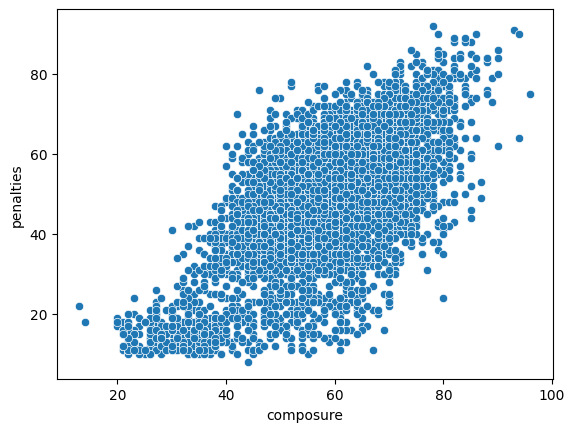

In [ ]:
sns.scatterplot(x='composure', y='penalties', data=df)

<Axes: xlabel='composure', ylabel='penalties'>

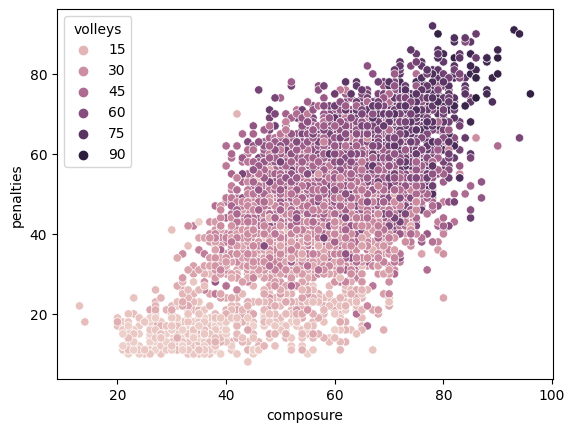

In [ ]:
sns.scatterplot(x='composure', y='penalties', data=df, hue='volleys')

<Axes: xlabel='ball_control', ylabel='dribbling'>

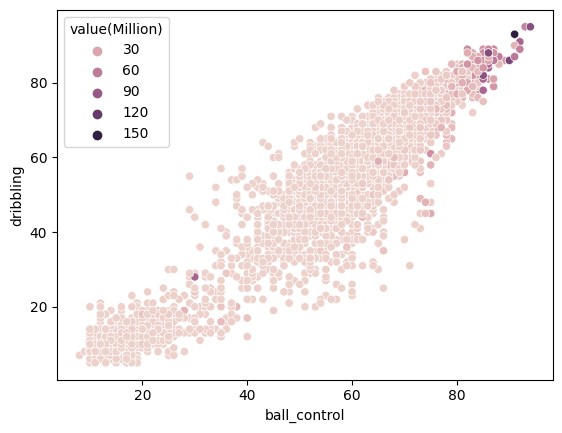

In [ ]:
sns.scatterplot(x='ball_control', y='dribbling', data=df, hue='value(Million)')

## **GOALKEEPER**

Skills of Goalkeeper depends on


*   gk_positioning
*   gk_diving
*   gk_handling
*   gk_kicking
*   gk_reflexes








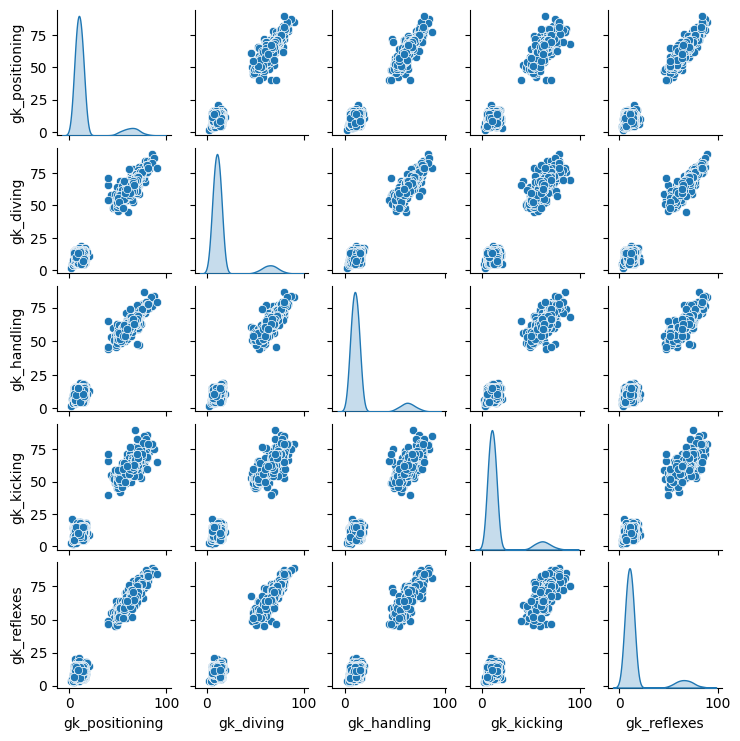

In [ ]:
sns.pairplot(data=df[['gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes']], diag_kind='kde', height=1.5)

**DEFENDERS**

 skills of Defenders depend on


*   acceleration
*   sprint_speed
*   slide_tackle
*   stand_tackle
*   interceptions








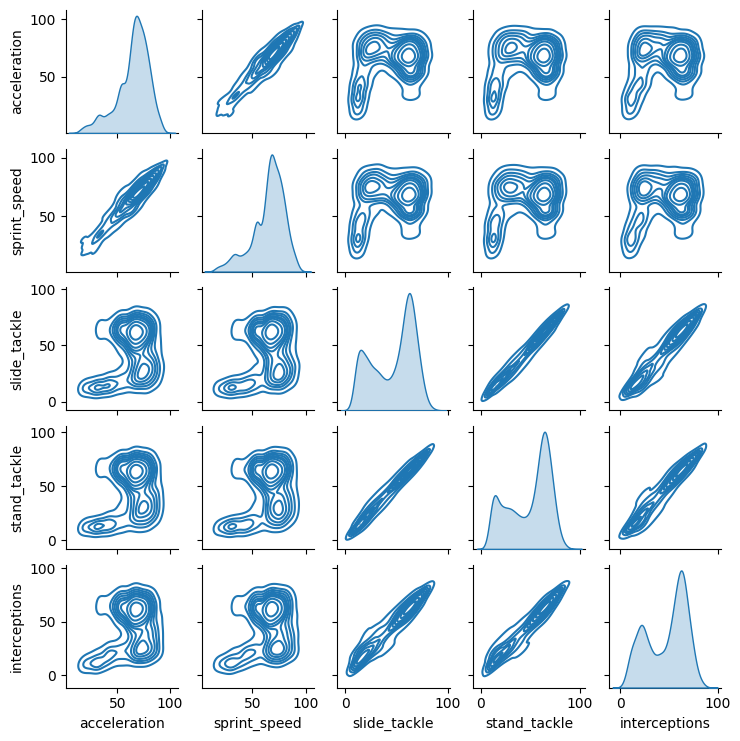

In [ ]:
sns.pairplot(data=df[['acceleration', 'sprint_speed', 'slide_tackle', 'stand_tackle',
       'interceptions']], kind='kde', height=1.5)

Middle-Fielder

skills of Middle-Fielder depends on


*   vision
*   ball_control
*   crossing
*   curve
*   Dribbling





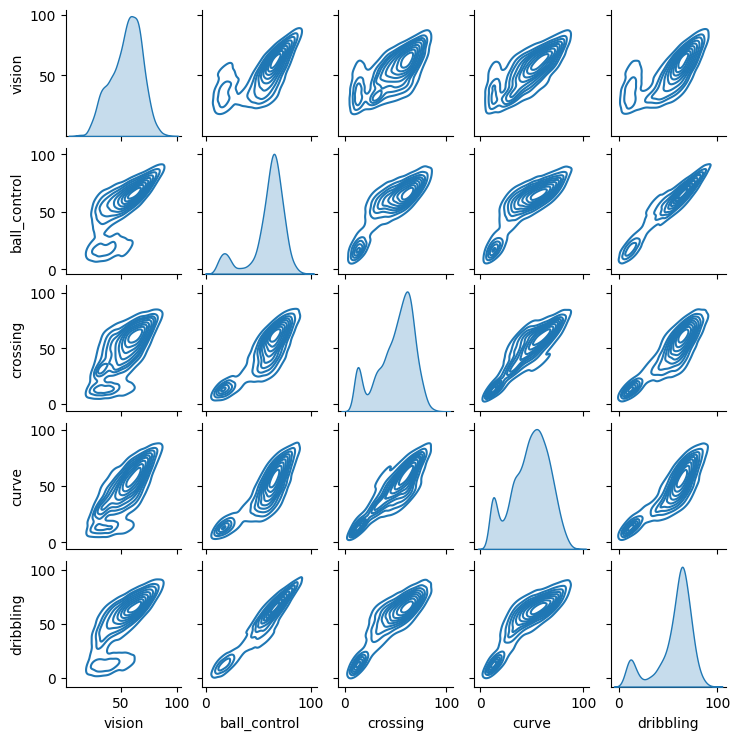

In [ ]:
sns.pairplot(data=df[['vision', 'ball_control', 'crossing', 'curve',
       'dribbling']], kind='kde', height=1.5)


**STRIKER**

skills of STRIKER depends on

*   dribbling
*   vision
*   att_position
*   ball_control
*   reactions





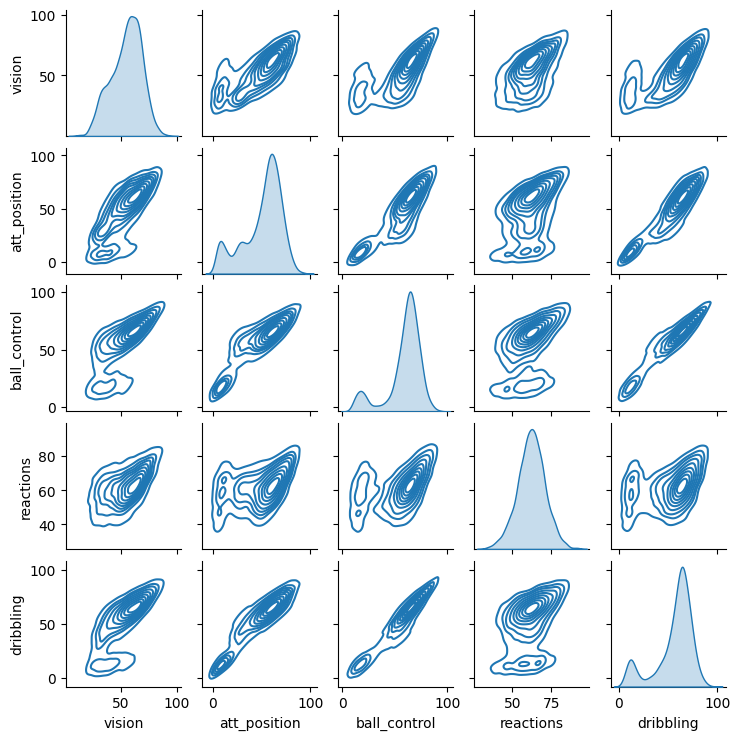

In [ ]:
sns.pairplot(data=df[['vision', 'att_position', 'ball_control', 'reactions',
       'dribbling']], kind='kde', height=1.5)

Both Dribbling and Reactions are main features for Players value. As shown in graph Dribbling and Reactions increases proportional to players value

Text(0, 0.5, 'reactions')

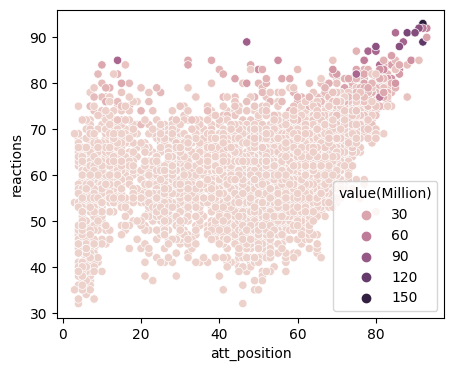

In [ ]:
plt.figure(figsize=(5, 4))
sns.scatterplot(
    data=df, x="att_position", y="reactions", hue="value(Million)"
)
plt.xlabel("att_position")
plt.ylabel("reactions")


Checking multicollinearity

In [ ]:
df.shape

(5682, 40)

In [ ]:
df.dtypes

player             object
country            object
height              int64
weight              int64
age                 int64
club               object
ball_control        int64
dribbling           int64
slide_tackle        int64
stand_tackle        int64
aggression          int64
reactions           int64
att_position        int64
interceptions       int64
vision              int64
composure           int64
crossing            int64
short_pass          int64
long_pass           int64
acceleration        int64
stamina             int64
strength            int64
balance             int64
sprint_speed        int64
agility             int64
jumping             int64
heading             int64
shot_power          int64
finishing           int64
long_shots          int64
curve               int64
fk_acc              int64
penalties           int64
volleys             int64
gk_positioning      int64
gk_diving           int64
gk_handling         int64
gk_kicking          int64
gk_reflexes 

In [ ]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [ ]:
num = ['int64','float64']
num_vars = list(df.select_dtypes(include=num))

In [ ]:
num_vars

['height',
 'weight',
 'age',
 'ball_control',
 'dribbling',
 'slide_tackle',
 'stand_tackle',
 'aggression',
 'reactions',
 'att_position',
 'interceptions',
 'vision',
 'composure',
 'crossing',
 'short_pass',
 'long_pass',
 'acceleration',
 'stamina',
 'strength',
 'balance',
 'sprint_speed',
 'agility',
 'jumping',
 'heading',
 'shot_power',
 'finishing',
 'long_shots',
 'curve',
 'fk_acc',
 'penalties',
 'volleys',
 'gk_positioning',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'value(Million)']

In [ ]:
df_num = df[num_vars]

In [ ]:
df_num.shape

(5682, 37)

In [ ]:
df.isna().sum()

player            0
country           0
height            0
weight            0
age               0
club              0
ball_control      0
dribbling         0
slide_tackle      0
stand_tackle      0
aggression        0
reactions         0
att_position      0
interceptions     0
vision            0
composure         0
crossing          0
short_pass        0
long_pass         0
acceleration      0
stamina           0
strength          0
balance           0
sprint_speed      0
agility           0
jumping           0
heading           0
shot_power        0
finishing         0
long_shots        0
curve             0
fk_acc            0
penalties         0
volleys           0
gk_positioning    0
gk_diving         0
gk_handling       0
gk_kicking        0
gk_reflexes       0
value(Million)    0
dtype: int64

In [ ]:
corrmatrix = df.corr()

<ipython-input-45-bd1232f55c79>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = df.corr()


In [ ]:
corrmatrix

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value(Million)
height,1.000000,0.758226,0.078035,-0.410892,-0.488629,-0.127182,-0.124389,-0.092750,-0.006116,-0.443529,...,-0.469077,-0.423947,-0.325790,-0.354500,0.360971,0.368215,0.366840,0.362558,0.369492,-0.014220
weight,0.758226,1.000000,0.214962,-0.334920,-0.405302,-0.108132,-0.103412,-0.018061,0.082216,-0.353643,...,-0.375677,-0.327594,-0.239806,-0.265158,0.331315,0.334757,0.333523,0.331381,0.336037,0.008034
age,0.078035,0.214962,1.000000,0.091697,0.036561,0.089824,0.102387,0.240008,0.407070,0.106496,...,0.146928,0.184823,0.160244,0.155240,0.101629,0.087877,0.095263,0.093675,0.094103,0.079439
ball_control,-0.410892,-0.334920,0.091697,1.000000,0.946800,0.447438,0.481385,0.614970,0.477615,0.875239,...,0.839057,0.772873,0.781639,0.800104,-0.800184,-0.807603,-0.805997,-0.799413,-0.806072,0.276533
dribbling,-0.488629,-0.405302,0.036561,0.946800,1.000000,0.352504,0.383005,0.522327,0.407388,0.913892,...,0.862463,0.783838,0.785428,0.818644,-0.775442,-0.781685,-0.779966,-0.776728,-0.781280,0.252102
slide_tackle,-0.127182,-0.108132,0.089824,0.447438,0.352504,1.000000,0.977919,0.733738,0.243784,0.195800,...,0.293967,0.253255,0.105647,0.071960,-0.548070,-0.549477,-0.547891,-0.546614,-0.547739,0.074743
stand_tackle,-0.124389,-0.103412,0.102387,0.481385,0.383005,0.977919,1.000000,0.751389,0.272392,0.232762,...,0.327142,0.286781,0.142846,0.113296,-0.570317,-0.570352,-0.569055,-0.567711,-0.569261,0.094124
aggression,-0.092750,-0.018061,0.240008,0.614970,0.522327,0.733738,0.751389,1.000000,0.424898,0.454076,...,0.453198,0.416142,0.388858,0.372052,-0.615157,-0.617614,-0.616529,-0.614010,-0.614455,0.183928
reactions,-0.006116,0.082216,0.407070,0.477615,0.407388,0.243784,0.272392,0.424898,1.000000,0.410101,...,0.424495,0.393452,0.381197,0.408966,-0.086684,-0.096023,-0.093922,-0.092476,-0.089677,0.498249
att_position,-0.443529,-0.353643,0.106496,0.875239,0.913892,0.195800,0.232762,0.454076,0.410101,1.000000,...,0.841457,0.781623,0.824752,0.866547,-0.697179,-0.706391,-0.702274,-0.697934,-0.702342,0.248584


<Axes: >

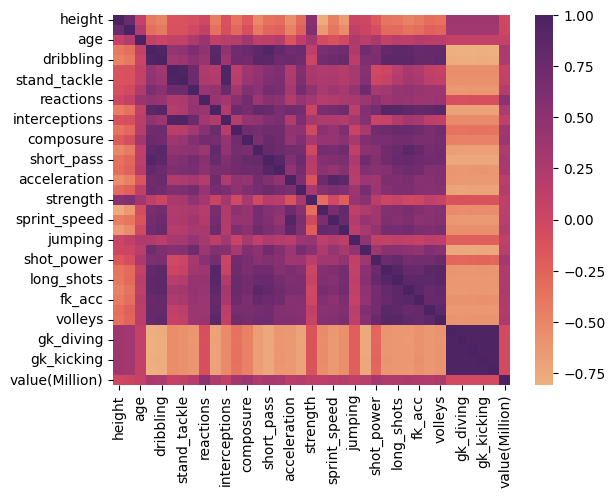

In [ ]:
sns.heatmap(corrmatrix, cmap='flare')

In [ ]:
def correlation(df, thresold):
  correlated_cols = set()
  corr_matrix = df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > thresold:
        name=corr_matrix.columns[i]
        correlated_cols.add(name)
  return correlated_cols





In [ ]:
correlation(df,0.95)

<ipython-input-48-0dcae95a5dfe>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


{'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'interceptions',
 'stand_tackle'}

FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
x = df.drop(columns=['country','club','player','value(Million)'])
y = df['value(Million)']
x_norm = StandardScaler().fit_transform(x)

sel = SelectFromModel(Lasso(alpha=0.05, random_state=42))
sel.fit(x_norm,y)


SelectFromModel(estimator=Lasso(alpha=0.05, random_state=42))

In [ ]:
sel.get_support()

array([ True, False,  True, False, False, False,  True,  True, False,
        True,  True,  True,  True, False, False, False,  True, False,
        True, False, False,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True])

In [ ]:
select_feat = x.columns[(sel.get_support())]

MODELING


In [ ]:
x_model = x[select_feat]
x_model.shape

(5682, 17)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_model, y, test_size=0.3, random_state=42)

In [ ]:
def plot_prediction_analysis(y, y_predic, figsize=(9,5), title=''):
  fig, axs = plt.subplots(1, 2, figsize=figsize)
  axs[0].scatter(y, y_predic)
  mn = min(np.min(y), np.min(y_predic))
  mx = max(np.max(y), np.max(y_predic))
  axs[0].plot([mn, mx], [mn, mx], c='red')
  axs[0].set_xlabel('$y$')
  axs[0].set_ylabel('$\hat{y}$')
  rmse = np.sqrt(mean_squared_error(y, y_predic))
  evs = explained_variance_score(y, y_predic)
  r2 = r2_score(y, y_predic)
  axs[0].set_title('rmse = {:.2f}, evs = {:.2f}, r2 = {:,.2f}'.format(rmse, evs, r2))
  axs[1].hist(y-y_predic, bins=5)
  avg = np.mean(y-y_predic)
  std = np.std(y-y_predic)
  axs[1].set_xlabel('$y - \hat{y}$')
  axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg,std))

  if title!='':
    fig.suptitle(title)


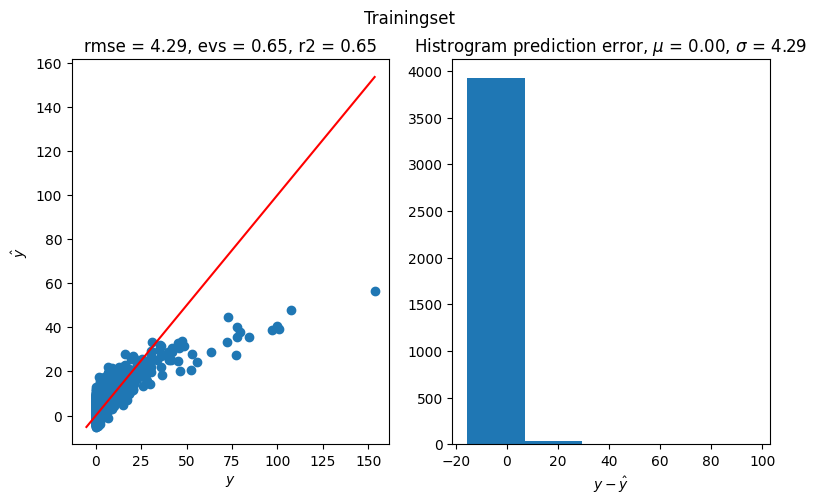

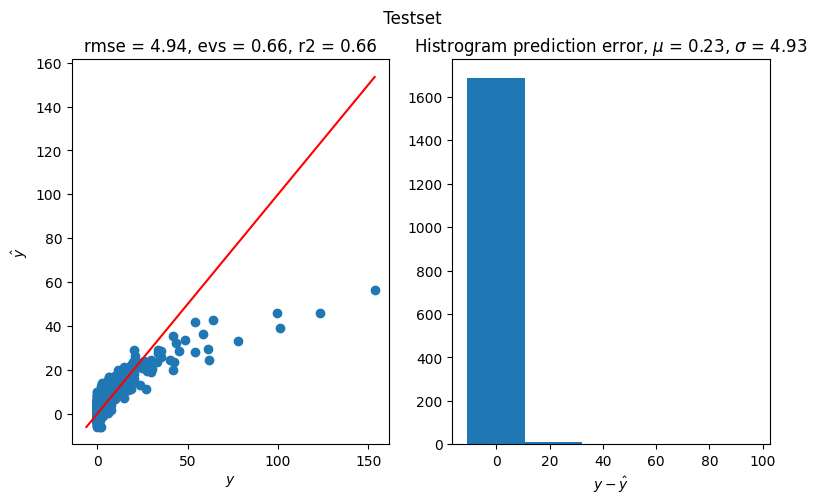

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


model = Pipeline((("standard_scalar", StandardScaler()),("poly",PolynomialFeatures(degree=2)),("lin_reg", Lasso(alpha=0.05))))
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
plot_prediction_analysis(y_train, y_train_pred, title='Trainingset')
y_test_pred = model.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title=' Testset')

Model selection


Linear Regression

In [ ]:
A = df.drop(columns=['country','club','player','value(Million)'])
B = df['value(Million)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.2, random_state=7)


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('coefficent', model.coef_)
y_predic = model.predict(X_test)
print("mean squared error", mean_squared_error(y_test,y_predic))

coefficent [ 5.72561427e-02 -2.12879207e-02 -3.13017312e-01  8.42326145e-03
 -8.03945866e-03 -2.74120722e-02  4.23605932e-02  1.61609888e-02
  3.39150782e-01 -1.81550960e-02 -2.47758786e-02  3.08052910e-02
  6.43160013e-02  3.10442687e-02  1.12109217e-02  1.08055714e-02
  7.49821866e-03 -1.47856909e-04  5.77910154e-03  5.39132302e-03
  2.68243151e-02 -6.93773006e-03  1.93048966e-03  4.33484366e-02
 -9.68012666e-03  4.23321476e-02 -4.21306751e-02  2.51564907e-02
  9.70031845e-03 -1.76872484e-02  2.97145866e-02  3.51720996e-02
  5.39748995e-02  2.48809790e-02  2.95039970e-02  5.03180667e-04]
mean squared error 30.683628116112573


RIDGE REGRESSION

In [ ]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.3, random_state=7)

ridge = Ridge()
parameter = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
ridge_regression = GridSearchCV(ridge, parameter, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(A,B)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 100}
-41.75262739819861


<ipython-input-65-7a5d8f83d956>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_ridge)


<Axes: xlabel='value(Million)', ylabel='Density'>

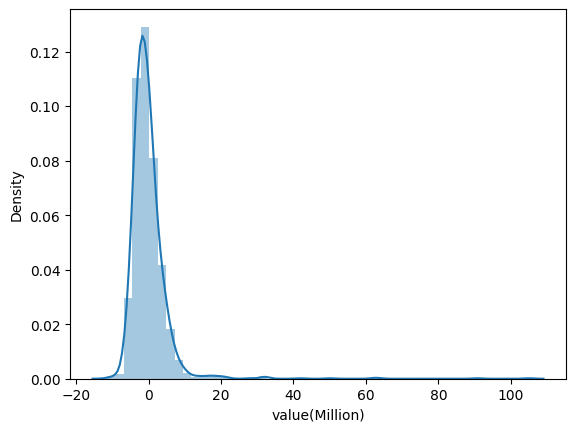

In [ ]:
prediction_ridge = ridge_regression.predict(X_test)
sns.distplot(y_test-prediction_ridge)

LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.3, random_state=7)

lasso = Lasso()
parameter = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
lasso_regression = GridSearchCV(lasso, parameter, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(A,B)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.000e+05, tolerance: 2.836e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.933e+04, tolerance: 2.836e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+05, tolerance: 2.860e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 0.01}
-41.74721119625603


<ipython-input-68-6b5a638027d2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)


<Axes: xlabel='value(Million)', ylabel='Density'>

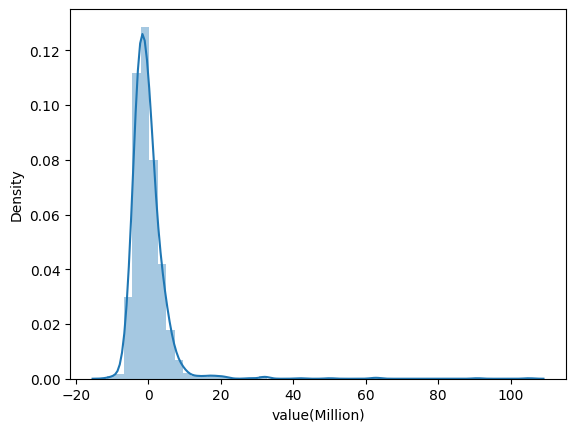

In [ ]:
prediction_lasso = lasso_regression.predict(X_test)
sns.distplot(y_test-prediction_lasso)

Model Improvements

XGboost fit on our data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_model, y, test_size=0.3, random_state=42)

In [ ]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test,y_test)

0.8637132069129082

In [ ]:

y_predic = xgb_model.predict(X_test)
print("mean squared error", mean_squared_error(y_test,y_predic))

mean squared error 9.841176147855553


**OLS METHOD**

In [ ]:
import statsmodels.api as sm
from scipy import stats

# Assuming x_model is the independent variable matrix and y is the dependent variable
model_1 = sm.OLS(np.log(y), x_model).fit()


# Extract residuals from the fitted model
res = model_1.resid

# Print the summary of the regression results
print_model = model_1.summary()
print(print_model)


                                 OLS Regression Results                                
Dep. Variable:         value(Million)   R-squared (uncentered):                   0.391
Model:                            OLS   Adj. R-squared (uncentered):              0.390
Method:                 Least Squares   F-statistic:                              404.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):                        0.00
Time:                        02:21:51   Log-Likelihood:                         -12505.
No. Observations:                5682   AIC:                                  2.503e+04
Df Residuals:                    5673   BIC:                                  2.509e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

**Check Q-Q plot for Normality**

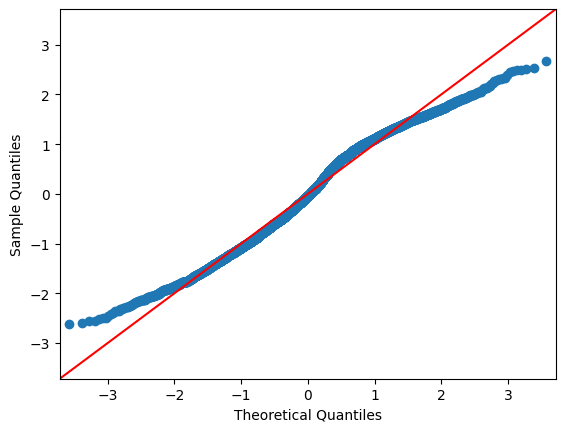

In [ ]:
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()


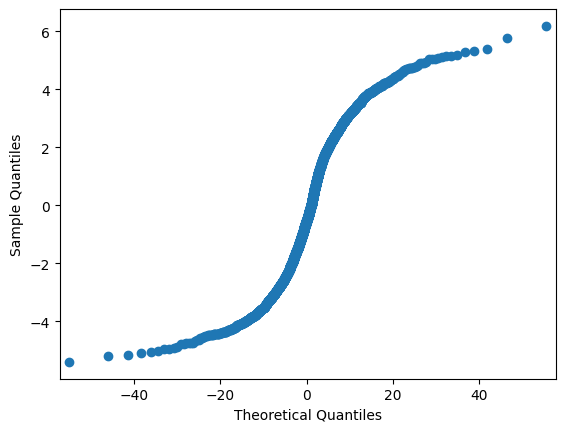

In [ ]:
 fig1 = sm.qqplot(res, stats.t, distargs=(4,), loc=0.25, scale=4.9)
 plt.show()


**OLS model with Box-Cox transformation**

In [ ]:


# Assuming 'value' is the dependent variable in your DataFrame 'y'
yhat, _ = stats.boxcox(y.values)

# Fit the OLS model with the transformed y
model = sm.OLS(yhat, x_model).fit()

# Extract residuals from the fitted model
res = model.resid

# Print the summary of the regression results
print_model = model.summary()
print(print_model)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.426
Model:                            OLS   Adj. R-squared (uncentered):              0.425
Method:                 Least Squares   F-statistic:                              468.4
Date:                Sun, 10 Dec 2023   Prob (F-statistic):                        0.00
Time:                        02:22:03   Log-Likelihood:                         -13414.
No. Observations:                5682   AIC:                                  2.685e+04
Df Residuals:                    5673   BIC:                                  2.691e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

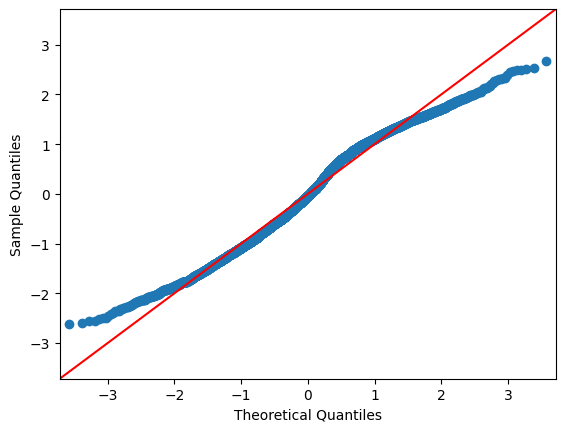

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.figure()
plt.show()


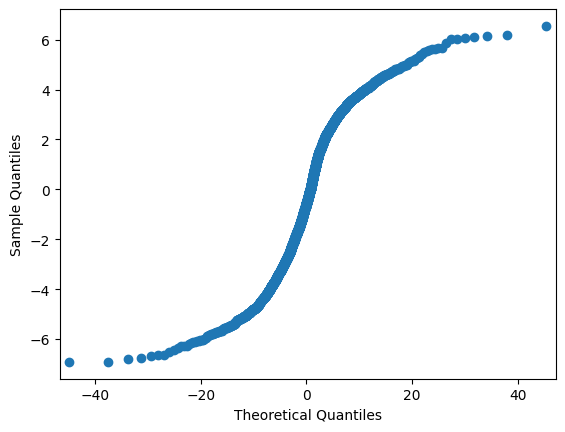

In [ ]:
fig1 = sm.qqplot(res, stats.t, distargs=(4,), loc=0.25, scale=4)
plt.show()


In [ ]:
X_train, X_test,y_train, y_test = train_test_split( x_model, yhat , test_size=0.3, random_state=42)


In [ ]:
model = sm.OLS(y_train, X_train).fit()
res = model.resid
print_model = model.summary()
print(print_model)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.431
Model:                            OLS   Adj. R-squared (uncentered):              0.430
Method:                 Least Squares   F-statistic:                              334.4
Date:                Sun, 10 Dec 2023   Prob (F-statistic):                        0.00
Time:                        02:22:21   Log-Likelihood:                         -9393.8
No. Observations:                3977   AIC:                                  1.881e+04
Df Residuals:                    3968   BIC:                                  1.886e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

2.5632322511184493

GOALKEEEPER

In [ ]:
x_model1 = x[['gk_positioning','gk_diving','gk_handling','age','weight','height','reactions','vision','short_pass','long_pass','stamina','strength','balance','agility','jumping','heading','long_shots']]

In [ ]:
X_train, X_test,y_train, y_test = train_test_split( x_model1, yhat , test_size=0.3, random_state=42)

In [ ]:
model = sm.OLS(y_train, X_train).fit()
res = model.resid


In [ ]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

1.4784883681172207

DEFENDERS

In [ ]:

x_model2 = x[['acceleration', 'sprint_speed', 'slide_tackle','height','weight','age','ball_control','dribbling','reactions','vision','composure','crossing','short_pass','long_pass','stamina','strength','balance','agility','curve','long_shots','shot_power']]

In [ ]:
X_train, X_test,y_train, y_test = train_test_split( x_model2, yhat , test_size=0.3, random_state=42)

In [ ]:
model = sm.OLS(y_train, X_train).fit()
res = model.resid


In [ ]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

1.5106161976919632

Middle-Fielder

In [ ]:
x_model3 = x[['vision', 'ball_control', 'crossing', 'curve','dribbling','height','weight','age','slide_tackle','short_pass','long_pass','stamina','strength','balance','agility','reactions','long_shots','shot_power','finishing','penalties','volleys']]

In [ ]:
X_train, X_test,y_train, y_test = train_test_split( x_model3, yhat , test_size=0.3, random_state=42)

In [ ]:
model = sm.OLS(y_train, X_train).fit()
res = model.resid

In [ ]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

1.5097924139471717

STRIKER

In [ ]:
x_model4 = x[['vision', 'aggression', 'att_position', 'ball_control', 'reactions','balance','agility','acceleration', 'sprint_speed','shot_power','finishing','penalties','volleys']]

In [ ]:
X_train, X_test,y_train, y_test = train_test_split( x_model4, yhat , test_size=0.3, random_state=42)

In [ ]:
model = sm.OLS(y_train, X_train).fit()
res = model.resid

In [ ]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

2.47558076332364

T-TEST(one sample)




In [ ]:
dft = df['height']


In [ ]:
print(dft)

0       192
1       181
2       193
3       187
4       191
       ... 
5677    175
5678    174
5679    175
5680    187
5681    195
Name: height, Length: 5682, dtype: int64


In [ ]:
len(dft)

5682

In [ ]:
dft_mean = np.mean(dft)
print(dft_mean)

181.67053854276662


In [ ]:
sample_size = 10
dft_sample = np.random.choice(dft,sample_size)
dft_sample

array([182, 197, 187, 178, 183, 182, 175, 172, 174, 190])

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
ttest,p_value = ttest_1samp(dft_sample,181.6)

In [ ]:
print(p_value)

0.8743507990901861


In [ ]:
if p_value < 0.05:
  print("we are rejecting null hypothesis")
else:
  print("we are fail to reject null hypothesis")

we are fail to reject null hypothesis
